## Assignment 1  

#### Dataset : [Metro Bike Share Trip Data](https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data)

**Context: This is a dataset hosted by the city of Los Angeles. The organization has an open data platform and they update their information according the amount of data that is brought in.**  

  
| Data Type     | Number of Columns|
|:------------- |:---------------- |
| Numeric       |10                |
| Date Type     |2                 |
| String        |4                 |


In [1]:
# Importing python libraries
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.grid_search import GridSearchCV

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.feature_selection as skl_fs

%matplotlib inline

In [3]:
#Importing the dataset using pandas library
df = pd.read_csv('metro-bike-share-trip-data.csv')
df.head()

C:\Users\Anurag\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [4]:
#Removing columns with IDs from the dataset
df = df.drop(['Starting Lat-Long','Ending Lat-Long','Start Time','End Time',
                          'Trip ID','Starting Station ID','Ending Station ID','Bike ID'],1)
df.head()


,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Plan Duration,Trip Route Category,Passholder Type
0,180,34.056610,-118.23721,34.056610,-118.23721,30.0,Round Trip,Monthly Pass
1,1980,34.056610,-118.23721,34.056610,-118.23721,30.0,Round Trip,Monthly Pass
2,300,34.052898,-118.24156,34.052898,-118.24156,365.0,Round Trip,Flex Pass
3,10860,34.052898,-118.24156,34.052898,-118.24156,365.0,Round Trip,Flex Pass
4,420,34.049889,-118.25588,34.049889,-118.25588,0.0,Round Trip,Walk-up


In [5]:
#Shape of the dataframe
print('shape of the data frame: ',df.shape,'\n')

shape of the data frame:  (132427, 8) 



## Handling the Missing Data

* count the number of nulls present in the dataset
* replace null from the numeric columns using the mean function
* replace null from the categorical column using mode function

In [6]:
# How much data is missing
df.isnull().sum().sort_values(ascending=False)

Ending Station Longitude      1051
Ending Station Latitude       1051
Plan Duration                  766
Starting Station Longitude      48
Starting Station Latitude       48
Passholder Type                  0
Trip Route Category              0
Duration                         0
dtype: int64

In [7]:
# Replcing null by mean values
cols = ["Ending Station Longitude", "Ending Station Latitude",
       "Starting Station Longitude","Starting Station Latitude"]
df[cols]=df[cols].fillna(df[cols].mean().iloc[0])

In [8]:
#Replacing nulls by mode values
cols1 = ['Plan Duration']
df[cols1]=df[cols1].fillna(df[cols1].mode().iloc[0])

In [9]:
#Check again for null values
df.isnull().sum().sort_values(ascending=False)

Passholder Type               0
Trip Route Category           0
Plan Duration                 0
Ending Station Longitude      0
Ending Station Latitude       0
Starting Station Longitude    0
Starting Station Latitude     0
Duration                      0
dtype: int64

## Data Distribution

* plot each columns using distplot or histogram 

C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 10000)

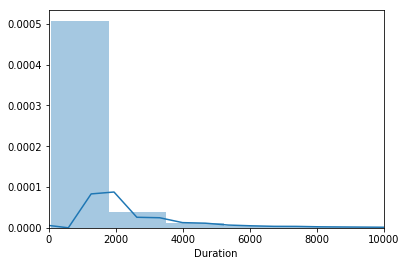

In [10]:
sns.distplot(df['Duration'])
plt.xlim(0,10000)
#plt.subplot(312)

C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-150, -110)

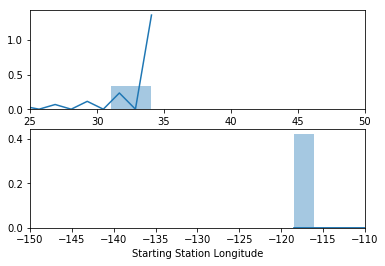

In [11]:
plt.subplot(211)
sns.distplot(df['Starting Station Latitude'])
plt.xlim(25,50)
plt.subplot(212)
sns.distplot(df['Starting Station Longitude'])
plt.xlim(-150,-110)

C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-150, -110)

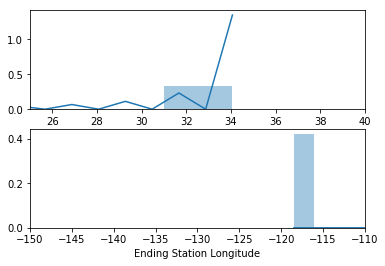

In [12]:
plt.subplot(211)
sns.distplot(df['Ending Station Latitude'])
plt.xlim(25,40)
plt.subplot(212)
sns.distplot(df['Ending Station Longitude'])
plt.xlim(-150,-110)

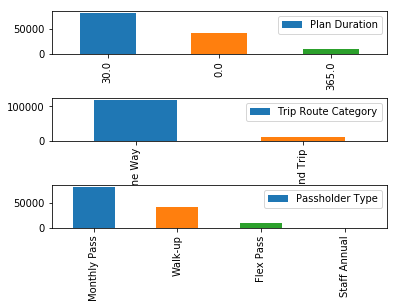

In [13]:
plt.subplots_adjust(hspace=1)
plt.subplot(311)
df['Plan Duration'].value_counts().plot(kind='bar')
plt.legend(loc='best')
plt.subplot(312)
df['Trip Route Category'].value_counts().plot(kind='bar')
plt.legend(loc='best')
plt.subplot(313)
df['Passholder Type'].value_counts().plot(kind='bar')
plt.legend(loc='best')

### Plot Summary:

#### Categorical Columns:
**Bar Chart:**
* Bar chart shows the frequecy of each categories present in the dataset
* There are 3 columns with the categorical values 
* x-axis represents the unique values from each columns
* y-axis represents the count of those values

#### Numerical Columns:
**Distribution Plot:**
* Data is more desperesed for 'Duration' columns as compared to 'Latitude' and 'Longitude' columns
* Values in 'Duration' column is distributed between 0 to 86000
* Values in 'Latitude' column is distributed between 30 to 34 while values in longitude column is ditributed between -120 to -110

In [14]:
# Describe each numerical columns statistics
print(df.describe())

            Duration  Starting Station Latitude  Starting Station Longitude  \
count  132427.000000              132427.000000               132427.000000   
mean     1555.301562                  33.984125                 -118.221529   
std      5814.241813                   2.945947                    1.838002   
min        60.000000                -118.206642                 -118.472832   
25%       360.000000                  34.044170                 -118.256980   
50%       600.000000                  34.046822                 -118.250954   
75%      1080.000000                  34.050880                 -118.241562   
max     86400.000000                  34.064281                    0.000000   

       Ending Station Latitude  Ending Station Longitude  Plan Duration  
count            132427.000000             132427.000000  132427.000000  
mean                 32.826359               -118.206642      44.736232  
std                  13.524340                  2.250927      90.1

### Columns Statistics:

**Mean and Standard deviation of the numrical columns are as follows**

  
| Column Name    | Mean Value| Std     |
|-------------   | --------- | ------- |
| Duration       |1555.30    |5814.24  |
| Starting Lat   |33.98      |2.94     |
| Starting Long  |-118.22    |1.838    |
| Ending Lat     |32.82      |13.52    |
| Ending Long    |-118.20    |2.25     |

* Based on mean and standard deviation values we can say that, the Duration columns is more distributed, meaning that the values are more spread out as compared to other Latitude and Longitude columns


## Outlier Detection

(0, 5000)

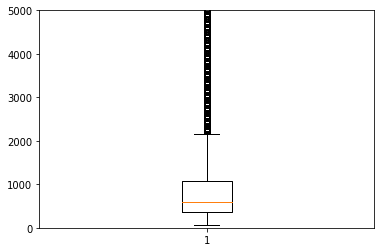

In [15]:
plt.boxplot(df['Duration'])
plt.ylim(0,5000)

In [16]:
# Outlier detection using Tukey Inter Quartile range
def find_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices,outlier_values

In [17]:
tukey_ind, tukey_values = find_outlier(df['Duration'])
print(np.sort(tukey_values))

[ 2220  2220  2220 ... 86400 86400 86400]


In [18]:
new_df = df[~df['Duration'].isin(tukey_values)]

In [19]:
tukey_ind, tukey_values = find_outlier(new_df['Starting Station Latitude'])
print(np.sort(tukey_values))
print('len',len(tukey_values))

[-118.20664157 -118.20664157 -118.20664157 ...   34.0642815    34.0642815
   34.0642815 ]
len 5248


In [20]:
new_df1 = new_df[~new_df['Starting Station Latitude'].isin(tukey_values)]

In [21]:
tukey_ind, tukey_values = find_outlier(new_df1['Ending Station Latitude'])
print(np.sort(tukey_values))
print('len',len(tukey_values))

[-118.20664157 -118.20664157 -118.20664157 ...   34.0642815    34.0642815
   34.0642815 ]
len 7191


In [22]:
new_df2 = new_df1[~new_df1['Ending Station Latitude'].isin(tukey_values)]

In [23]:
tukey_ind, tukey_values = find_outlier(new_df2['Plan Duration'])
print(np.sort(tukey_values))
print('len',len(tukey_values))

[365. 365. 365. ... 365. 365. 365.]
len 8053


In [24]:
new_df3 = new_df2[~new_df2['Plan Duration'].isin(tukey_values)]

In [25]:
tukey_ind, tukey_values = find_outlier(new_df3['Plan Duration'])
print(np.sort(tukey_values))
print('len',len(tukey_values))

[]
len 0


In [26]:
new_df3.shape

(99470, 8)

## Correlation Matrics

                            Duration  Starting Station Latitude  \
Duration                    1.000000                  -0.037487   
Starting Station Latitude  -0.037487                   1.000000   
Starting Station Longitude  0.068422                   0.175825   
Ending Station Latitude    -0.016934                   0.229677   
Ending Station Longitude    0.062820                   0.099389   
Plan Duration              -0.434789                   0.028364   

                            Starting Station Longitude  \
Duration                                      0.068422   
Starting Station Latitude                     0.175825   
Starting Station Longitude                    1.000000   
Ending Station Latitude                       0.126411   
Ending Station Longitude                      0.423587   
Plan Duration                                -0.031934   

                            Ending Station Latitude  Ending Station Longitude  \
Duration                                  

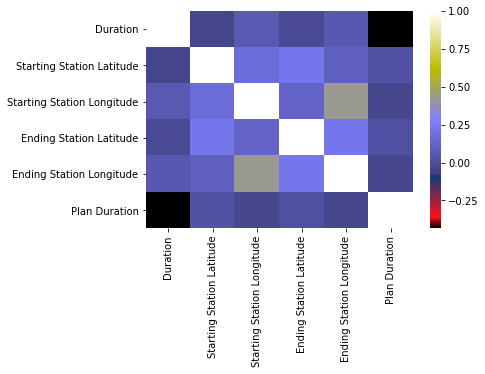

In [27]:
correlation = new_df3.corr()
print(correlation)
sns.heatmap(correlation,cmap='gist_stern')

## EDA Summary

1. LA Bike share trip Data has total **Missing Values = 2964** 
2. Each Null value has been replaced by either **mean** or **mode**, depending on their data type
3. Data set also has few columns with ID's, which is not relevant for predictive analysis
4. Shape of the original dataset was **Row=132427 and Column = 8**
5. Out of 8 columns **Numerical columns = 5** and **Categorical Columns = 3**
6. Categorical columns needed 0 and 1 encoding by creating dummy variables
7. There were outliers present in Numerical columns which has been removed by calculating **Tukey Inter Quartile** range

## Analyze Data

In [28]:
new_df = np.round(new_df,decimals=2)
new_df.head()

,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Plan Duration,Trip Route Category,Passholder Type
0,180,34.06,-118.24,34.06,-118.24,30.0,Round Trip,Monthly Pass
1,1980,34.06,-118.24,34.06,-118.24,30.0,Round Trip,Monthly Pass
2,300,34.05,-118.24,34.05,-118.24,365.0,Round Trip,Flex Pass
4,420,34.05,-118.26,34.05,-118.26,0.0,Round Trip,Walk-up
5,780,34.05,-118.24,34.04,-118.24,30.0,One Way,Monthly Pass


In [29]:
#check the outcome variable
print(new_df['Trip Route Category'].value_counts())

One Way       111963
Round Trip      7999
Name: Trip Route Category, dtype: int64


In [30]:
#converting outcome categories to 1's and 0's
new_df['Trip_Route_Category']=[0 if x =='One Way' else 1 for x in new_df['Trip Route Category']]
new_df=new_df.drop('Trip Route Category',axis=1)

In [31]:
# separating feature and outcome columns from the dataset
features = new_df.drop('Trip_Route_Category',1)
outcome = new_df.Trip_Route_Category

In [32]:
# Check for unique categories
for column_name in features.columns:
    if (features[column_name].dtype =='object'):
        unique_cat = len(features[column_name].unique())
        print("Features '{column_name}' has {unique_cat} unique category".format(column_name=column_name,unique_cat=unique_cat))

Features 'Passholder Type' has 4 unique category


In [33]:
# create a dummy list of categorical columns
dummy_list = ['Plan Duration','Passholder Type']

In [34]:
#defined a function to replace the categorical columns with dummy varible columns
def dummy_df(features,dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(features[x],prefix=x,dummy_na=False)
        features = features.drop(x,1)
        features = pd.concat([features,dummies],axis=1)
    return features

In [35]:
#intiating the dummy_df function for features dataset
new_features = dummy_df(features,dummy_list)
new_features.head()

,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Plan Duration_0.0,Plan Duration_30.0,Plan Duration_365.0,Passholder Type_Flex Pass,Passholder Type_Monthly Pass,Passholder Type_Staff Annual,Passholder Type_Walk-up
0,180,34.06,-118.24,34.06,-118.24,0,1,0,0,1,0,0
1,1980,34.06,-118.24,34.06,-118.24,0,1,0,0,1,0,0
2,300,34.05,-118.24,34.05,-118.24,0,0,1,1,0,0,0
4,420,34.05,-118.26,34.05,-118.26,1,0,0,0,0,0,1
5,780,34.05,-118.24,34.04,-118.24,0,1,0,0,1,0,0


## Analysis

#### Algorithms selected for predective analysis:
1. KNN(K-Nearest Neighbors)
2. XGBoost(Extreme Gradient Boosting)  


#### Metrics to evaluate the algorithms:
1. classification report
2. Accuracy
3. Confusion Matrix

### KNN (k-nearest Neighbour)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_features, outcome, test_size=0.30)

In [37]:
print('Training features',X_train.shape)
print('Training outcome',y_train.shape)
print('Testing features',X_test.shape)
print('Testing outcome',y_test.shape)

Training features (83973, 12)
Training outcome (83973,)
Testing features (35989, 12)
Testing outcome (35989,)


In [38]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
y_pred = knn.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [41]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[32878   775]
 [  942  1394]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.97     33653
          1       0.64      0.60      0.62      2336

avg / total       0.95      0.95      0.95     35989

Accuracy: 95.23%


### XGBoost(Extream Gradient Boosting)

In [42]:
# fit model no training data
X_train, X_test, y_train, y_test = train_test_split(new_features, outcome, test_size=0.30)
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
y_pred = model.predict(X_test)

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
predictions = [round(value) for value in y_pred]
print(classification_report(y_test, y_pred)) 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     33585
          1       0.79      0.34      0.48      2404

avg / total       0.94      0.95      0.94     35989

Accuracy: 95.01%


### Dimension Reduction and Feature Selection

In [45]:
X_train, X_test, y_train, y_test = train_test_split(new_features, outcome, test_size=0.30)

select = skl_fs.SelectKBest(k=10)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices=True)
colname_selected = [new_features.columns[i] for i in indices_selected]

X_train_selected = X_train[colname_selected]
X_test_selected = X_test[colname_selected]

### Grid search for KNN

In [46]:
k_range = list(range(1,31))
weight_options = ['uniform','distance']

param_grid = dict(n_neighbors=k_range,weights=weight_options)
print(param_grid)

knn = KNeighborsClassifier()  
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(new_features,outcome)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [47]:
grid.grid_scores_

[mean: 0.94846, std: 0.00856, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.94846, std: 0.00856, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95157, std: 0.00649, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.95228, std: 0.00636, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.95221, std: 0.00695, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.95419, std: 0.00664, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.95322, std: 0.00583, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.95575, std: 0.00579, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.95294, std: 0.00617, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.95702, std: 0.00592, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.95285, std: 0.00614, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.95745, std: 0.00612, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.95179, std: 0.00630, para

In [48]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9599289775095446
{'n_neighbors': 24, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='distance')


### Grid Search for XGBoost

In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_features, outcome, test_size=0.30)

In [50]:
#Simultaneous multiple parameter search
max_depth_range = list(range(1,6))
booster_options = ['gbtree','gblinear','dart']
param_grid = dict(max_depth=max_depth_range,booster=booster_options)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5], 'booster': ['gbtree', 'gblinear', 'dart']}


In [51]:
grid = GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
grid.fit(new_features,outcome)

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'booster': ['gbtree', 'gblinear', 'dart']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
grid.grid_scores_

[mean: 0.93751, std: 0.00362, params: {'booster': 'gbtree', 'max_depth': 1},
 mean: 0.94060, std: 0.00379, params: {'booster': 'gbtree', 'max_depth': 2},
 mean: 0.94952, std: 0.00599, params: {'booster': 'gbtree', 'max_depth': 3},
 mean: 0.95680, std: 0.00506, params: {'booster': 'gbtree', 'max_depth': 4},
 mean: 0.96124, std: 0.00548, params: {'booster': 'gbtree', 'max_depth': 5},
 mean: 0.93282, std: 0.00046, params: {'booster': 'gblinear', 'max_depth': 1},
 mean: 0.93282, std: 0.00046, params: {'booster': 'gblinear', 'max_depth': 2},
 mean: 0.93282, std: 0.00046, params: {'booster': 'gblinear', 'max_depth': 3},
 mean: 0.93282, std: 0.00046, params: {'booster': 'gblinear', 'max_depth': 4},
 mean: 0.93282, std: 0.00046, params: {'booster': 'gblinear', 'max_depth': 5},
 mean: 0.93751, std: 0.00362, params: {'booster': 'dart', 'max_depth': 1},
 mean: 0.94060, std: 0.00379, params: {'booster': 'dart', 'max_depth': 2},
 mean: 0.94952, std: 0.00599, params: {'booster': 'dart', 'max_depth':

In [53]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9612377252796719
{'booster': 'gbtree', 'max_depth': 5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


## Re-building the model with best parameters

### KNN

In [54]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [55]:
classifier = KNeighborsClassifier(n_neighbors=1,weights = 'uniform')  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [56]:
y_pred = classifier.predict(X_test) 

In [57]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[32633  1001]
 [  800  1555]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97     33634
          1       0.61      0.66      0.63      2355

avg / total       0.95      0.95      0.95     35989

Accuracy: 95.00%


### XGBoost

In [58]:
model = XGBClassifier(booster='gbtree',max_depth=5)
model = model.fit(X_train, y_train)

In [59]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [60]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[33291   343]
 [ 1035  1320]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     33634
          1       0.79      0.56      0.66      2355

avg / total       0.96      0.96      0.96     35989

Accuracy: 96.17%


## Summary

**STEPS:**
1. Divided the data into train [70%] and test [30%] set
1. Trained my model with the default parameters and with all the columns of training set
3. Tested the accuracy using the test set
4. Performed feature selection using **sklearn.feature_selection** library
5. Performed grid search operation using **GridSearchCV** library to find the best parameters
6. Trained my model again based on the best features and best parameters
7. Tested the accuracy using the test set


| Algorithms             | Accuracy  | Accuracy after Features selection and grid search|
|-------------           | --------- | -------|
| K-Nearest Neighbors    |**95.36%** |**97.59%**  |
| XG Boost               |**95.54%** |**97.69%**  |


## Conclusion

**Based on the Accuracy and Classification reports it is clear that, XGBoost algorithm gives better result for this dataset**  

**The accuracy and algoritm table indicates that, Accuracy of both the algorithms has been improved by more than 2% after selecting the best features and the best parameters**

**In order to achieve the improved accuracy these are the steps that we can follow:**
* Replace all the missing values using mean(Numerical values) and mode(Categorical Values)
* Remove the columns which contains IDs
* Remove the outliers from the dataset
* Select the best features from the dataset
* Choose the best hyper-parameters for algorithms